# Goal: Given a taxi trip, predict the travel time!

Useful data analysis:
https://www.julienphalip.com/blog/kaggle-competition-report-ecml-pkdd-2015-taxi/

paper on how to develop models:
https://arxiv.org/abs/1508.00021

NYC reference:
https://github.com/AnshRockstar/NYC-Taxi-Trip-Duration-Prediction/blob/main/NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb

Heat map for traffic times:
https://www.tomtom.com/traffic-index/porto-traffic/

### General Info

TRIP_ID: (String) - An unique identifier for each trip; \
CALL_TYPE: (char) - Category of the ride. It may contain one of three possible values: \
‘A’ if this trip was dispatched from the central \
‘B’ if this trip was demanded directly to a taxi driver on a specific stand \
‘C’ otherwise (i.e. a trip demanded on a random street \
ORIGIN_CALL: (integer) - An unique identifier for the phone number to call the taxi. It identifies the trip’s customer \ 
if CALL_TYPE=’A’. Otherwise, it assumes a NULL value; \
ORIGIN_STAND: (integer) - An unique identifier for the taxi stand. It identifies the starting point of the trip if CALL_TYPE=’B’. Otherwise, it assumes a NULL value; \
TAXI_ID: (integer) - An unique identifier for the taxi that performed each trip; \
TIMESTAMP: (integer) - Unix Timestamp (in seconds). It identifies the trip’s start; \
DAYTYPE: (char) - It identifies the daytype of the trip’s start. It assumes one of three possible values: \
‘A’ if this trip started on a normal day or weekend \
‘B’ if this trip started on a holiday or other special day \
‘C’ if the trip started on a day before a type-B day \
MISSING_DATA: (Boolean) - It is FALSE when the GPS data stream is complete and TRUE whenever one (or more) locations are missing \
POLYLINE: (String): - A list of GPS coordinates (i.e. WGS84 format) mapped as a string. The beginning and the end of the string are identified with brackets (i.e. [ and ]). Each pair of coordinates is also identified by the same brackets as [LONGITUDE, LATITUDE]. The coordinates were recorded every 15 seconds during the trip. The first item represents the starting point and the last item corresponds to the destination. \
The travel time of the trip (the prediction target of this project) is defined as the (number of points-1) x 15 seconds. For example, a trip with 101 data points in POLYLINE has a length of (101-1) * 15 = 1500 seconds. Some trips have missing data points in POLYLINE, indicated by MISSING_DATA column, and it is part of the challenge how you utilize this knowledge.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import torch

#https://www.julienphalip.com/blog/kaggle-competition-report-ecml-pkdd-2015-taxi/
import pickle
import csv
import calendar
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
# from matplotlib.ticker import  MultipleLocator, FormatStrFormatterfrom sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
plot_trip_dur = pd.read_csv("plot_trip_dur.csv")
plot_trip_dur

,TRIP_ID,TRIP_DUR_SEC
0,1372636858620000589,345
1,1372637303620000596,285
2,1372636951620000320,975
3,1372636854620000520,645
4,1372637091620000337,435
...,...,...
1710655,1404171463620000698,480
1710656,1404171367620000670,450
1710657,1388745716620000264,0
1710658,1404141826620000248,930


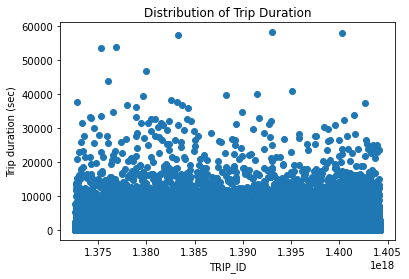

In [4]:
plt.scatter(plot_trip_dur['TRIP_ID'], plot_trip_dur['TRIP_DUR_SEC'])
plt.xlabel('TRIP_ID')
plt.ylabel('Trip duration (sec)')
plt.title('Distribution of Trip Duration')
plt.show()